## Задание 1

Каждый из 10 человек - либо аналитик, который всегда говорит правду, либо негодяй,
который всегда говорит неправду. Каждый из них загадал определенное натуральное число.
Потом первый сказал: «Мое число больше 1», второй сказал: «Мое число больше 2», ...,
десятый сказал: «Мое число больше 10». После этого они же, выступая в другом порядке,
сказали (каждый один раз): «Мое число меньше 1», «Мое число меньше 2», ..., «Мое число
меньше 10». Какое наибольшее число аналитиков могло быть среди этих 10 человек?

### Решение

Пусть рыцарь загадал число $x$ и сказал, что $x < a$ и $x > b$, тогда следуя из условия будет выполняться неравенство $1 <= a < x < b <= 10$. Из этого следует, что рыцарь не может сказать о том, что его число больше $9$ и $10$, а значит лжецов минимум двое.
Подберем пример, в котором количество рыцарей будет равно $8$. Предположим, что рыцари загадали числа $2..9$ и сказали в этом же порядке, что их числа меньше $3..10$, а также больше $1..8$, тогда получится:

- $1 <= 1 < 2 < 3 <= 10$
- $1 <= 2 < 3 < 4 <= 10$
- $1 <= 3 < 4 < 5 <= 10$
- $1 <= 4 < 5 < 6 <= 10$
- $1 <= 5 < 6 < 7 <= 10$
- $1 <= 6 < 7 < 8 <= 10$
- $1 <= 7 < 8 < 9 <= 10$
- $1 <= 8 < 9 < 10 <= 10$

Лжецы же скажут, что их числа больше $9..10$ и меньше $1..2$, а данных условия являются взаимоисключающими

## Задание 2

На сайте https://job.realweb.ru/ при клике на один из элементов на сайте выводится
сообщение: “One step closer!”. Оно выглядит примерно вот так:

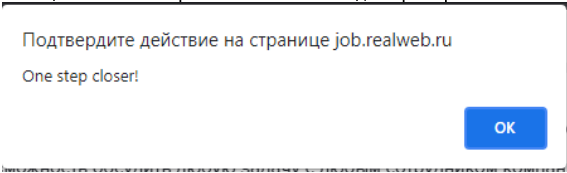

Найдите этот элемент и вкратце опишите, как вы это сделали.
Подсказка: не нужно тыкать на всё подряд, вам помогут инструменты разработчика браузера
(правая кнопка -&gt; посмотреть код). Там есть все подсказки

### Решение

Открываем ссылку, заходим в инструменты разработчика через f12 и через поиск ищем фразу "One step closer!". Находим элемент страницы с кодом, переходим по ссылке на страницу, снова f12 и ищем элемент class\x3d"rw_love". Находим на странице смайлик сердце. Кликаем и получаем искомое сообщение. Скриншоты ходов ниже

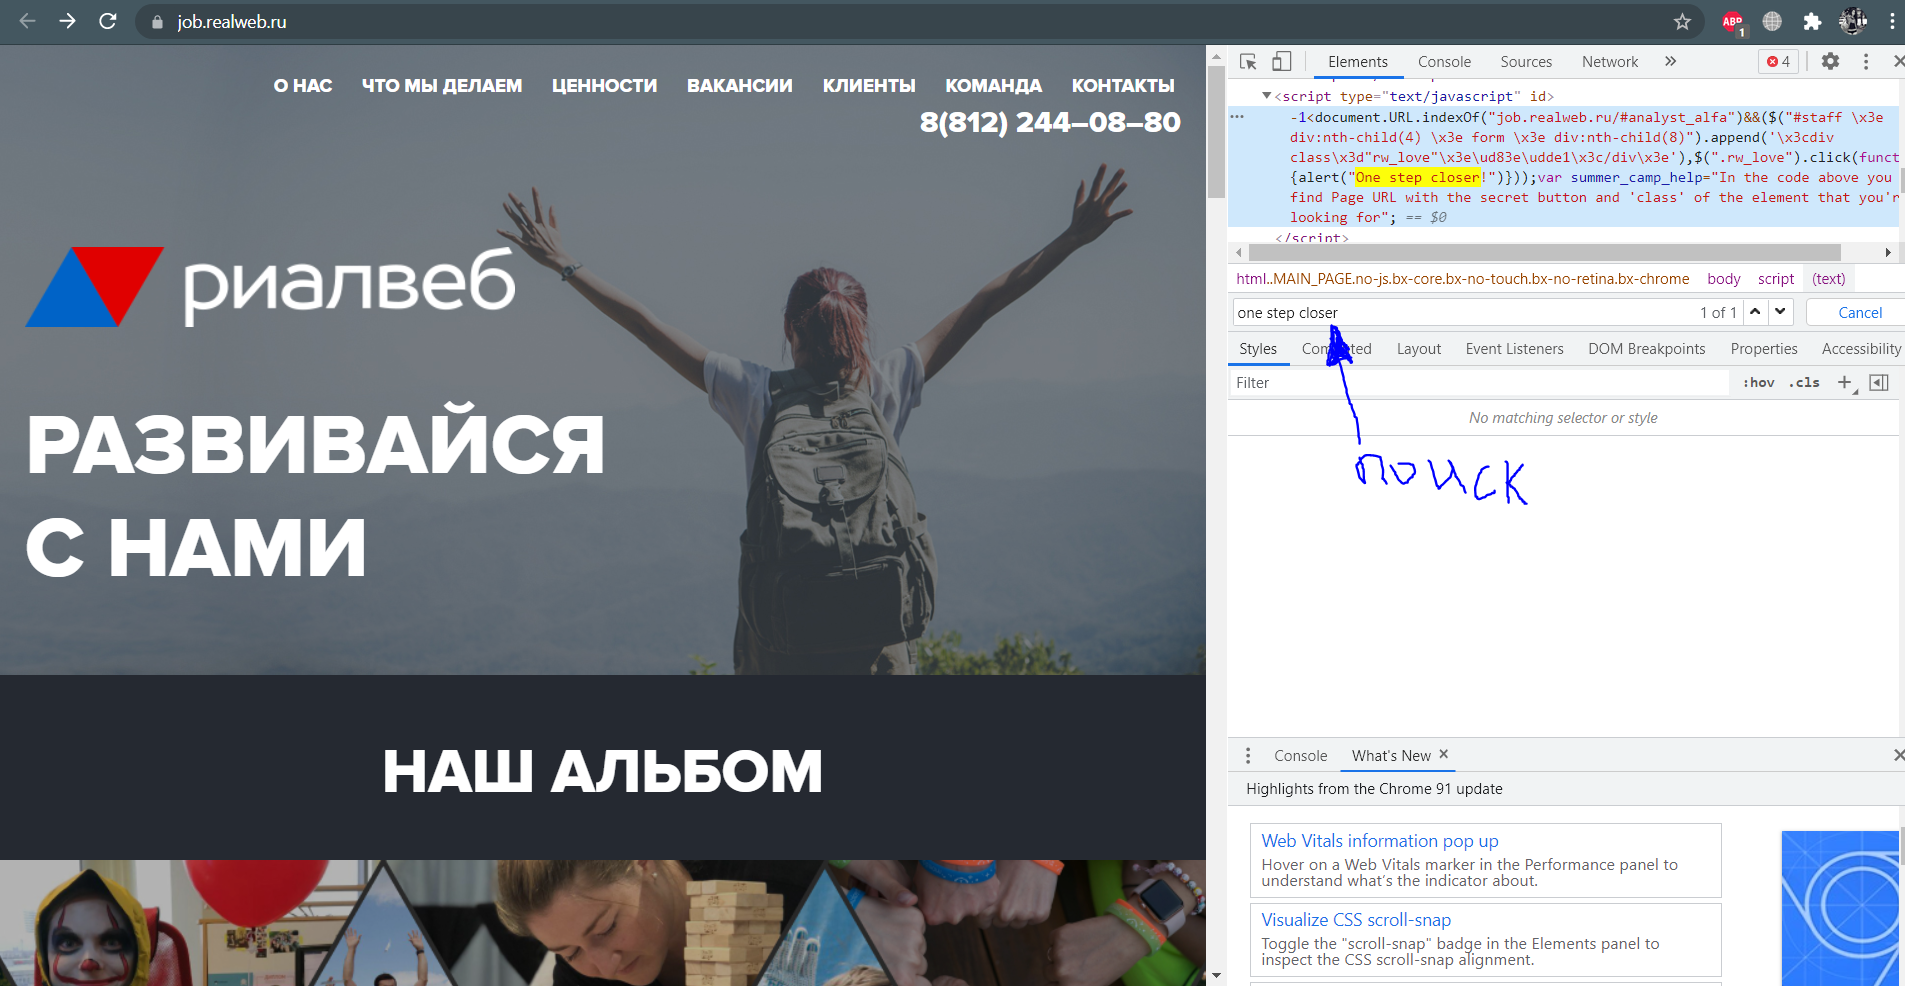

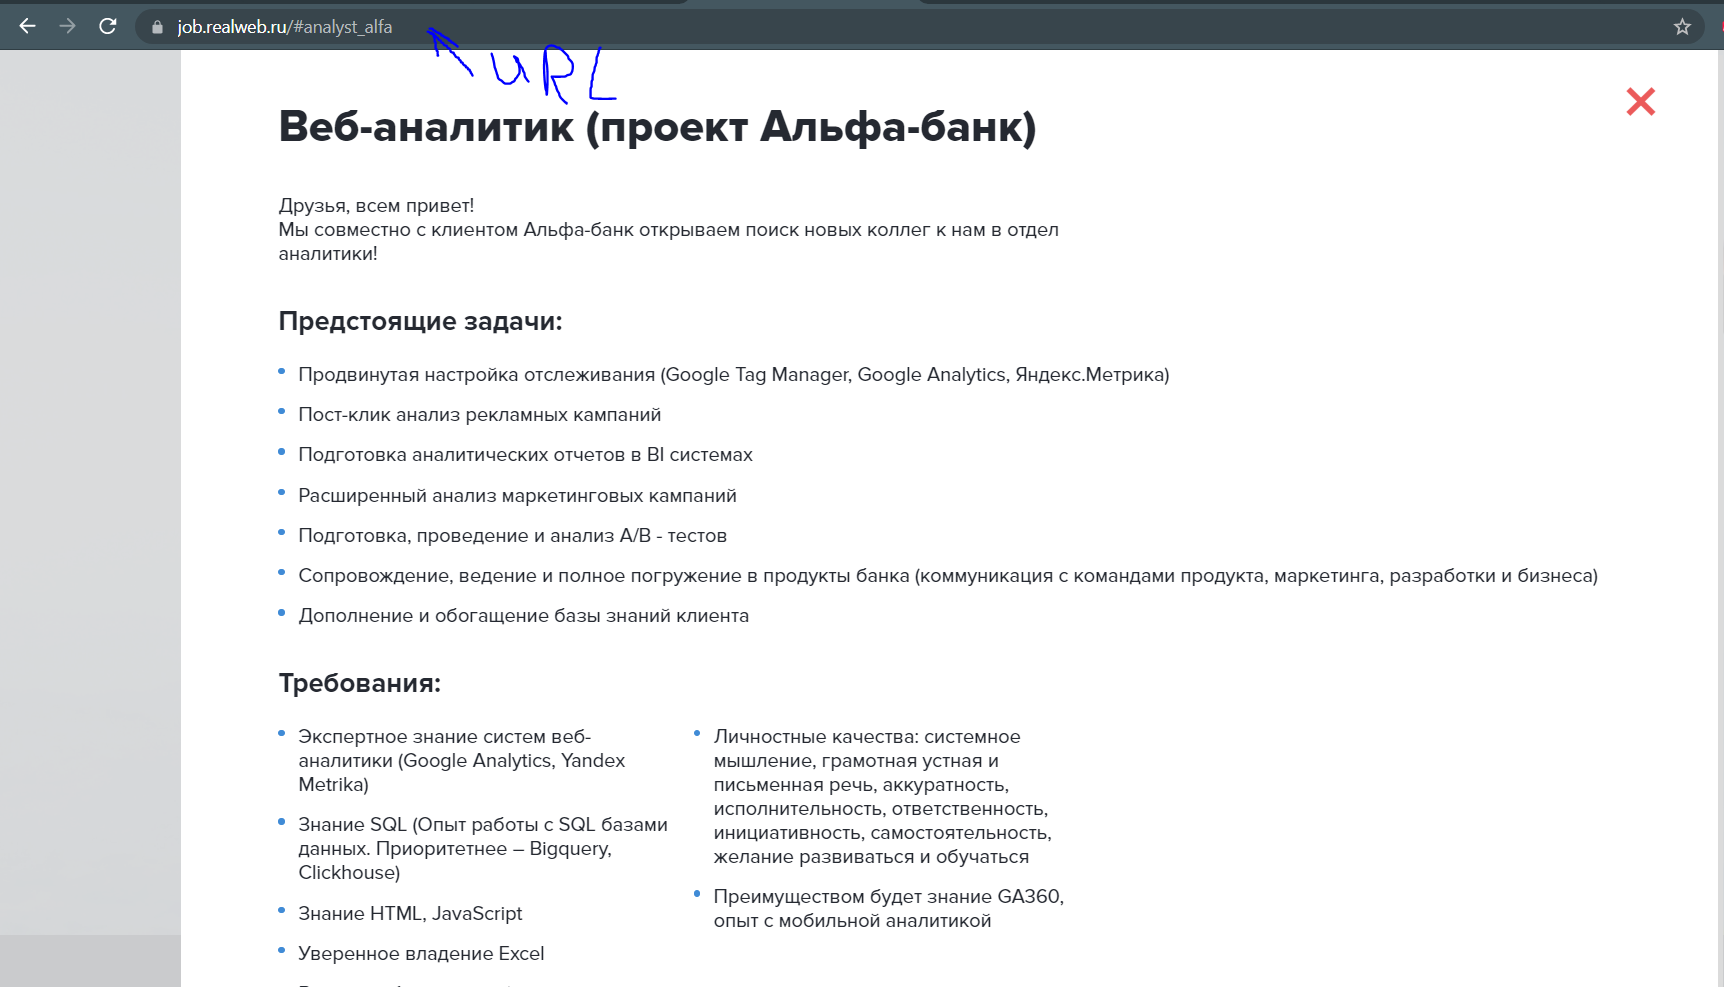

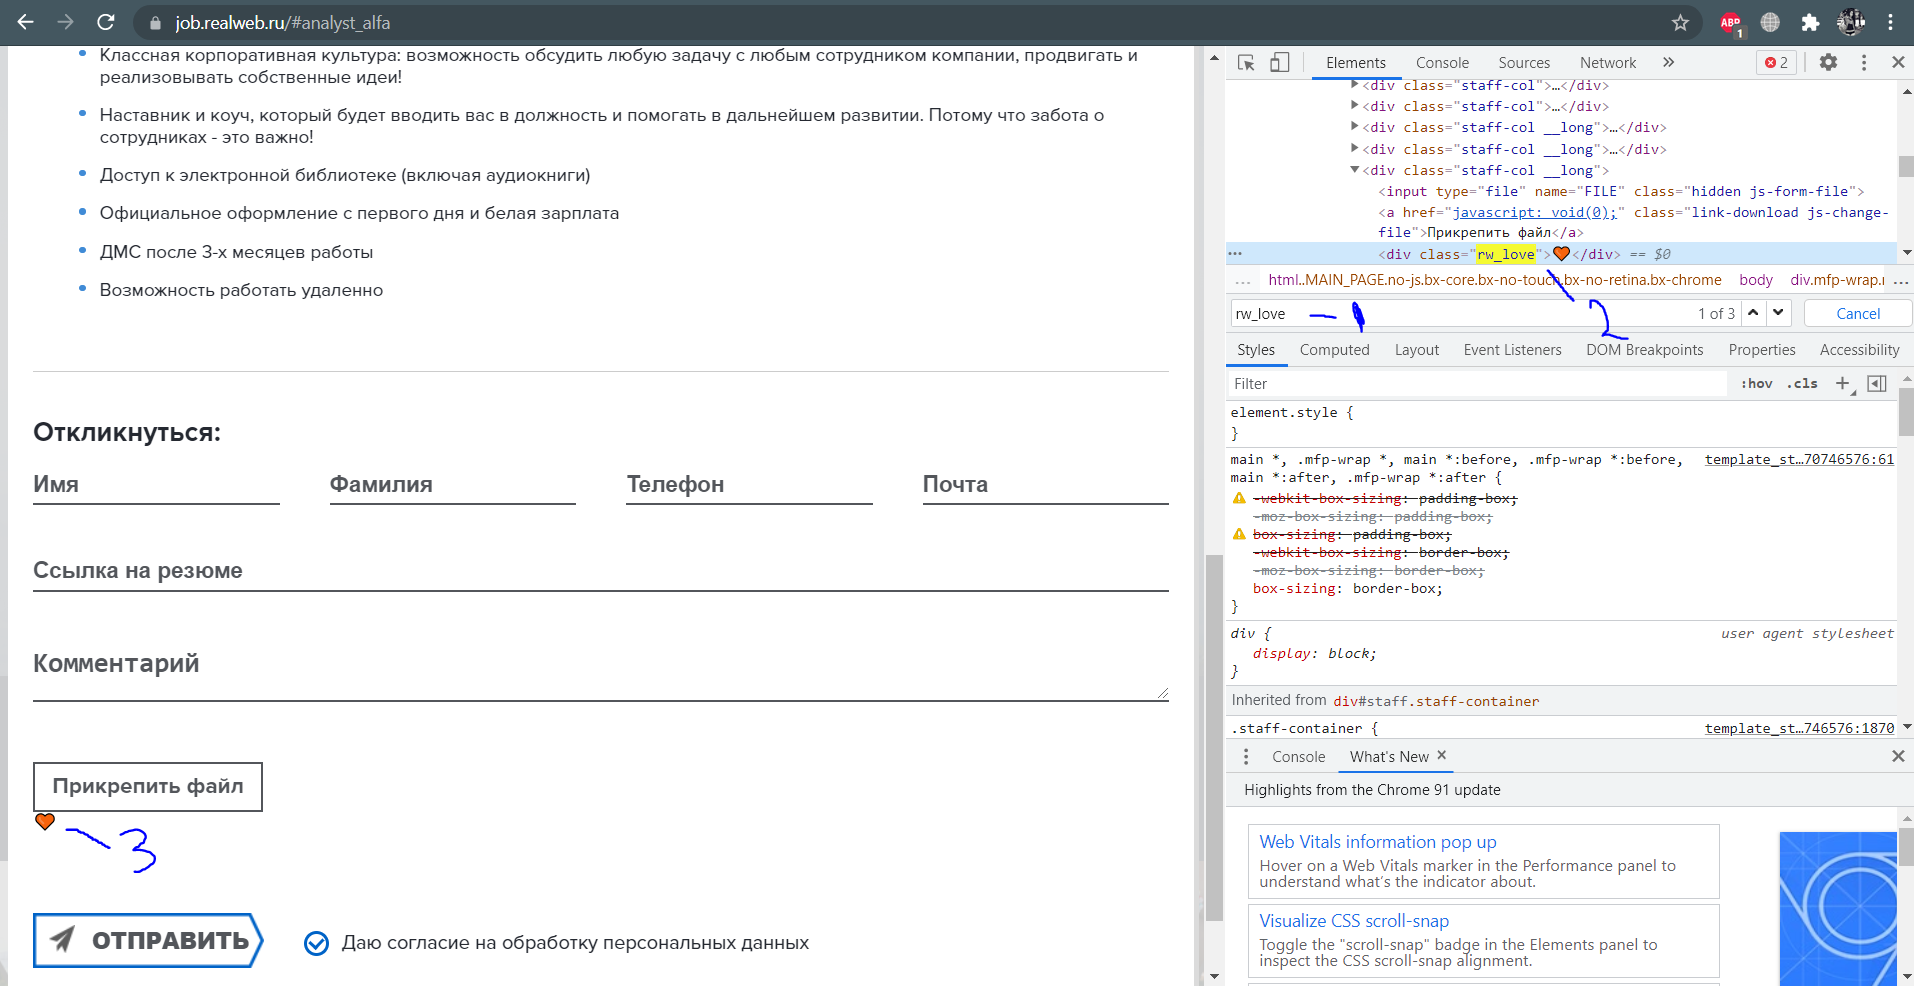

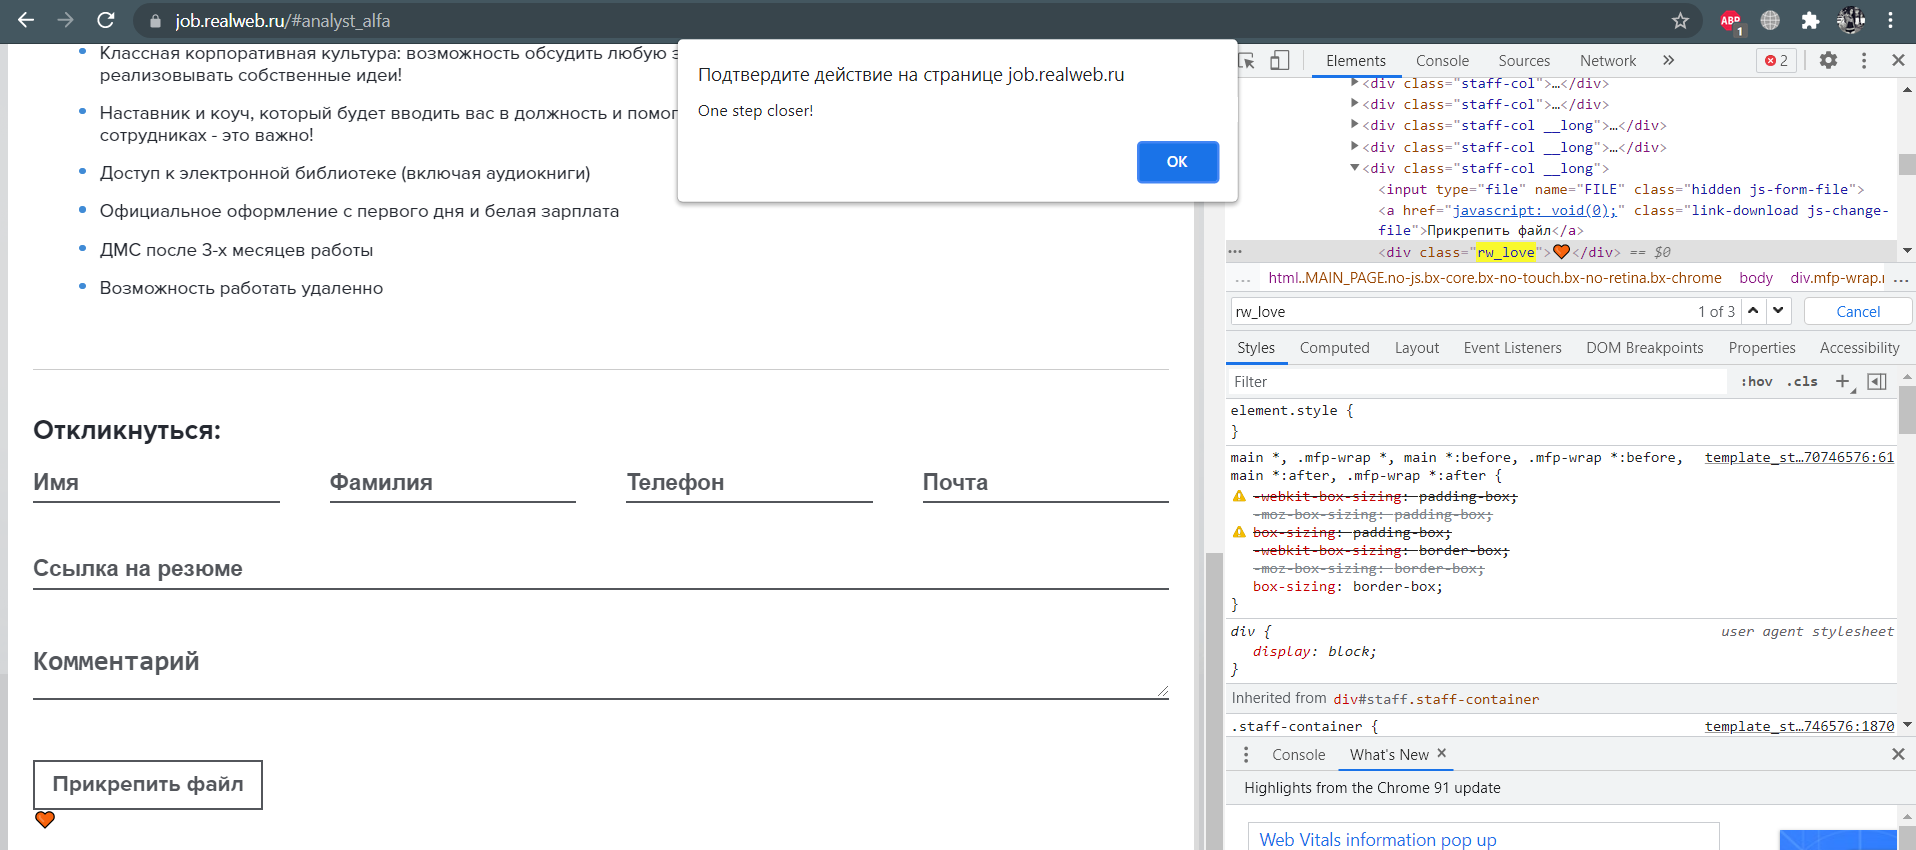

## Задание 3

Перед вами датасет некой интернет-компании. Загрузите его в Exce/BI/Py/R/куда удобно,
ознакомьтесь с данными и ответьте на приведенные ниже вопросы. Для ответа на некоторые
из них понадобится произвести расчеты, ход которых вы можете прикрепить файлом к
заданию.
- Какой рекламный канал принёс больше всего дохода за всё время?
- Как изменился средний чек транзакции после введения коронавирусных ограничений?
Как он изменился для пользователей, покупающих с промокодом и без? (параметр
«promo_activated»)
- Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в
транзакцию) в выходные дни отличается от CR в будние дни?
- Вам необходимо спрогнозировать объем дохода, полученного с пользователей,
приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед.
Опишите, как бы вы подошли к этой задаче и какие дополнительные данные вам
понадобятся?
- Если ты нашел что-то еще интересное в данных, то тоже пиши ;)

### Решение

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats 

In [53]:
df = pd.read_csv('summer_camp_data.csv', encoding='windows-1251', parse_dates=[0])
df.head(5)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0


#### Решение пункта 1

In [54]:
df.groupby('source').revenue.sum().sort_values(ascending=False)

source
yandex           4.674748e+08
google           4.565170e+08
(direct)         2.384474e+08
admitad          6.573886e+07
eLama            1.643239e+07
cityads          1.429077e+07
promo            5.363685e+06
co-promo         3.347826e+06
newsletter       2.225289e+06
other            1.839654e+06
DuckDuckGo       9.214030e+05
vk               6.176850e+05
actionpay        5.557170e+05
bing             4.727260e+05
advertise        4.404360e+05
mytarget         4.136530e+05
opmcpa           3.938250e+05
facebook         2.940910e+05
instagram        1.527800e+04
yandex_direct    1.296000e+04
sailplay         1.294100e+04
exponea          8.804000e+03
baidu            0.000000e+00
youtube          0.000000e+00
Name: revenue, dtype: float64

Итого больше всего дохода принес Яндекс

#### Решение пункта 2 (Влияние промоакции)

In [133]:
# Средний чек

df['avgBill'] = df.revenue / df.transactions
df.avgBill.fillna(0, inplace=True)

In [134]:
# Сортируем датасет по дате

df = df.sort_values(by='date')

In [135]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=df[df.promo_activated =='no'].groupby('date').avgBill.sum().index, y=df[df.promo_activated =='no'].groupby('date').avgBill.sum(), mode='lines'))
fig.show() 

In [152]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df[df.promo_activated =='yes'].groupby('date').avgBill.sum().index, y=df[df.promo_activated =='yes'].groupby('date').avgBill.sum(), mode='lines'))
fig.show() 

Честно говоря из графиков информацию о влиянии промо получить довольно сложно, особенно учитывая пики на первом графике. При подсчете среднего от суммы средних чеков за все время с учетом промо и без можно заметить, что среднее значение с промо выше чем без.

In [138]:
print('Значение без промоакций -', df[df.promo_activated =='no'].groupby('date').avgBill.sum().mean())
print('Значение c промоакциями -', df[df.promo_activated =='yes'].groupby('date').avgBill.sum().mean())

Значение без промоакций - 83054.25448170395
Значение c промоакциями - 88103.3041040907


In [164]:
# Проверим гипотезу о разности средних значений наших средних чеков за все время
# Нулевая гипотеза - различия случайны
# Альтернативная гипотеза - средний чек с промоакциями выше, чем без них

weightstats.ttest_ind(df[df.promo_activated =='no'].groupby('date').avgBill.sum(), df[df.promo_activated =='yes'].groupby('date').avgBill.sum()) 

(-4.540689948366686, 6.904024940447246e-06, 546.0)

значение p-value оказалось значительно ниже уровня значимости 0.01 (6.904024940447246e-06 < 0.01). В связи с этим мы получили статистически значимый результат и можем отвергнуть нулевую гипотезу в пользу альтернативной.

#### Влияние короновирусных ограничений

In [167]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.groupby('date').avgBill.sum().index, y=df.groupby('date').avgBill.sum(), mode='lines'))
fig.show() 

В условии не было уточнено для какой страны ввод ограничений, но будем считать, что в России. На графике видно несколько пиков активности: 6 марта, 26 марта, 17 апреля.
6 и 26 марта это собственно даты ввода ограничений в стране, информацию за 17 марта к сожалению найти не удалось, но скорее всего этот пик так же связан с ограничениями, так как большинство людей сидели дома.  
Попробуем сравнить средние значения продаж до ввода короновирусных ограничений и после

In [141]:
x, y = df[df.date < '2020-03-06'], df[df.date >= '2020-03-06']

In [173]:
# Проверим гипотезу о разности средних значений наших средних чеков за все время
# Нулевая гипотеза - различия случайны, разница средних равна 0
# Альтернативная гипотеза - разница средних не равна 0

weightstats.ttest_ind(x.groupby('date').avgBill.sum(), y.groupby('date').avgBill.sum()) 

(0.22731529090518082, 0.8203493460020672, 272.0)

По итогу у нас нет достаточно оснований отвергать нулевую гипотезу, p-value значительно выше любого из трех уровней значимостей. Из графика можно заметить, что, несмотря на несколько пиков продаж непосредственно в дни введения новых ограничений, суммарные продажи остались на доковидном уровне. С другой стороны было бы у нас больше данных о доковидных продажах, возможно результат выглядел бы по-другому.

### Решение пункта 3

In [174]:
# Находим коэффициент конверсии (решил взять за количество пользователей, количество посещений)

df['CR'] = df.transactions / df.visits * 100

In [175]:
df['CR']

11477     45.110410
43339    100.000000
50049     38.461538
30326      0.000000
22444      0.000000
            ...    
8043       2.067183
8042       5.755396
8041      79.687500
40115      0.000000
44428     75.000000
Name: CR, Length: 52724, dtype: float64

In [176]:
# Создадим новый признак указывающий флагом является ли день выходным или нет (без учета праздников)

df['weekend'] = df.date.dt.weekday.apply(lambda x: 1 if x==5 or x==6 else 0)

In [177]:
df.date.dt.weekday.value_counts()

4    7986
5    7869
6    7613
2    7386
0    7321
3    7305
1    7244
Name: date, dtype: int64

In [178]:
df['weekend'].value_counts()

0    37242
1    15482
Name: weekend, dtype: int64

In [179]:
df.groupby('weekend').CR.mean()

weekend
0    37.628755
1    40.007239
Name: CR, dtype: float64

In [180]:
# Проверим гипотезу о разности средних значений CR
# Нулевая гипотеза - различия случайны, разница средних равна 0
# Альтернативная гипотеза - разница средних не равна 0, CR в выходные дни отличается от CR в будние дни

weightstats.ttest_ind(df[df.weekend == 1].CR, df[df.weekend == 0].CR) 

(6.465790659456288, 1.0164855996604641e-10, 52722.0)

p-value = 1.0164855996604641e-10

1.0164855996604641e-10 < 0.05, отвергаем нулевую гипотезу в пользу альтернативной. С уверенностью в 95% можем сказать, что CR в выходные дни отличается от CR в будние дни. 

### Решение пункта 4

Возможно, для предсказания аналитическим методом (на глазок) мне бы потребовалась информация о том, продажи чего собственно осущществляются. Но лично я, имея конечно достаточно знаний, воспользовался бы машинным обучением, а именно моделью авторегрессии скользящего среднего ARIMA. Вообще вопрос достаточно сложный, так как знаний о временных рядах у меня мало, так что это максимум, что я могу ответить.

## Задание 4

Перед вами демо-счетчик Firebase (система аналитики мобильных приложений). Перейди на
сайт, подтверди действие, и ты увидишь дашборд.
Ответьте на вопросы:
- У пользователей какой платформы (Android или iOS) выше удержание на второй месяц
пользования приложением?
- Какая доля пользователей доходит до 3го уровня?
- Жители какой страны чаще остальных завершают уровни? А начинают?

### Решение пункта 1

Удержание на платформе Android

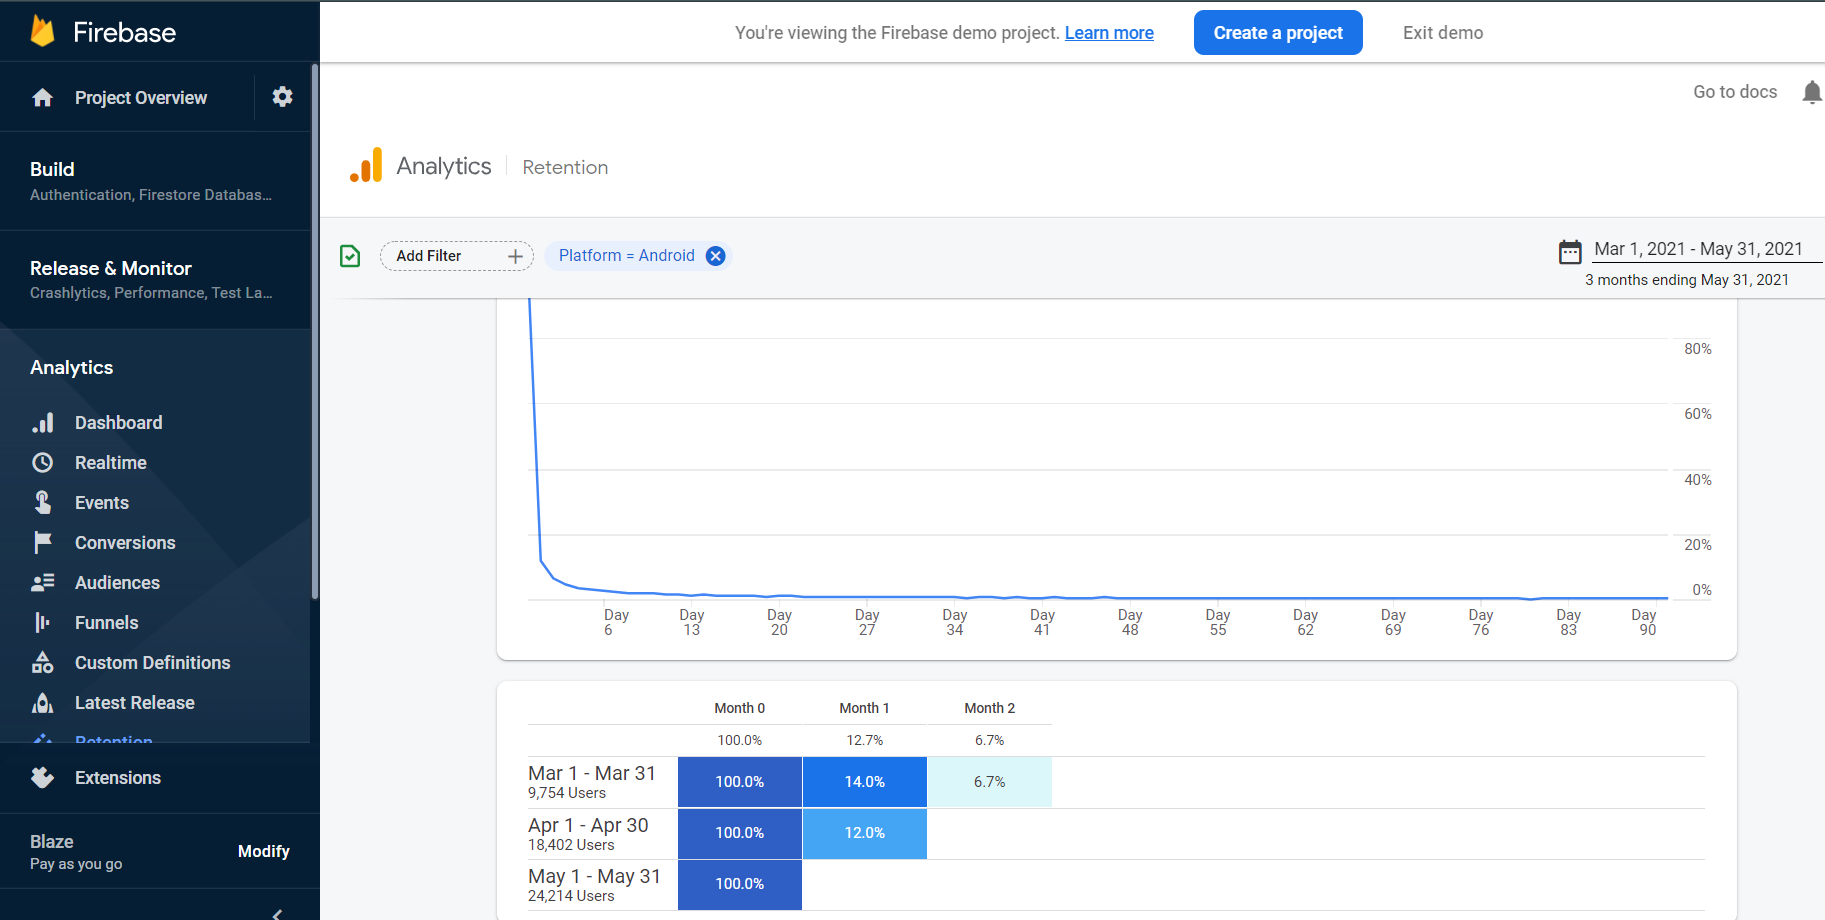

Удержание на платформе iOS

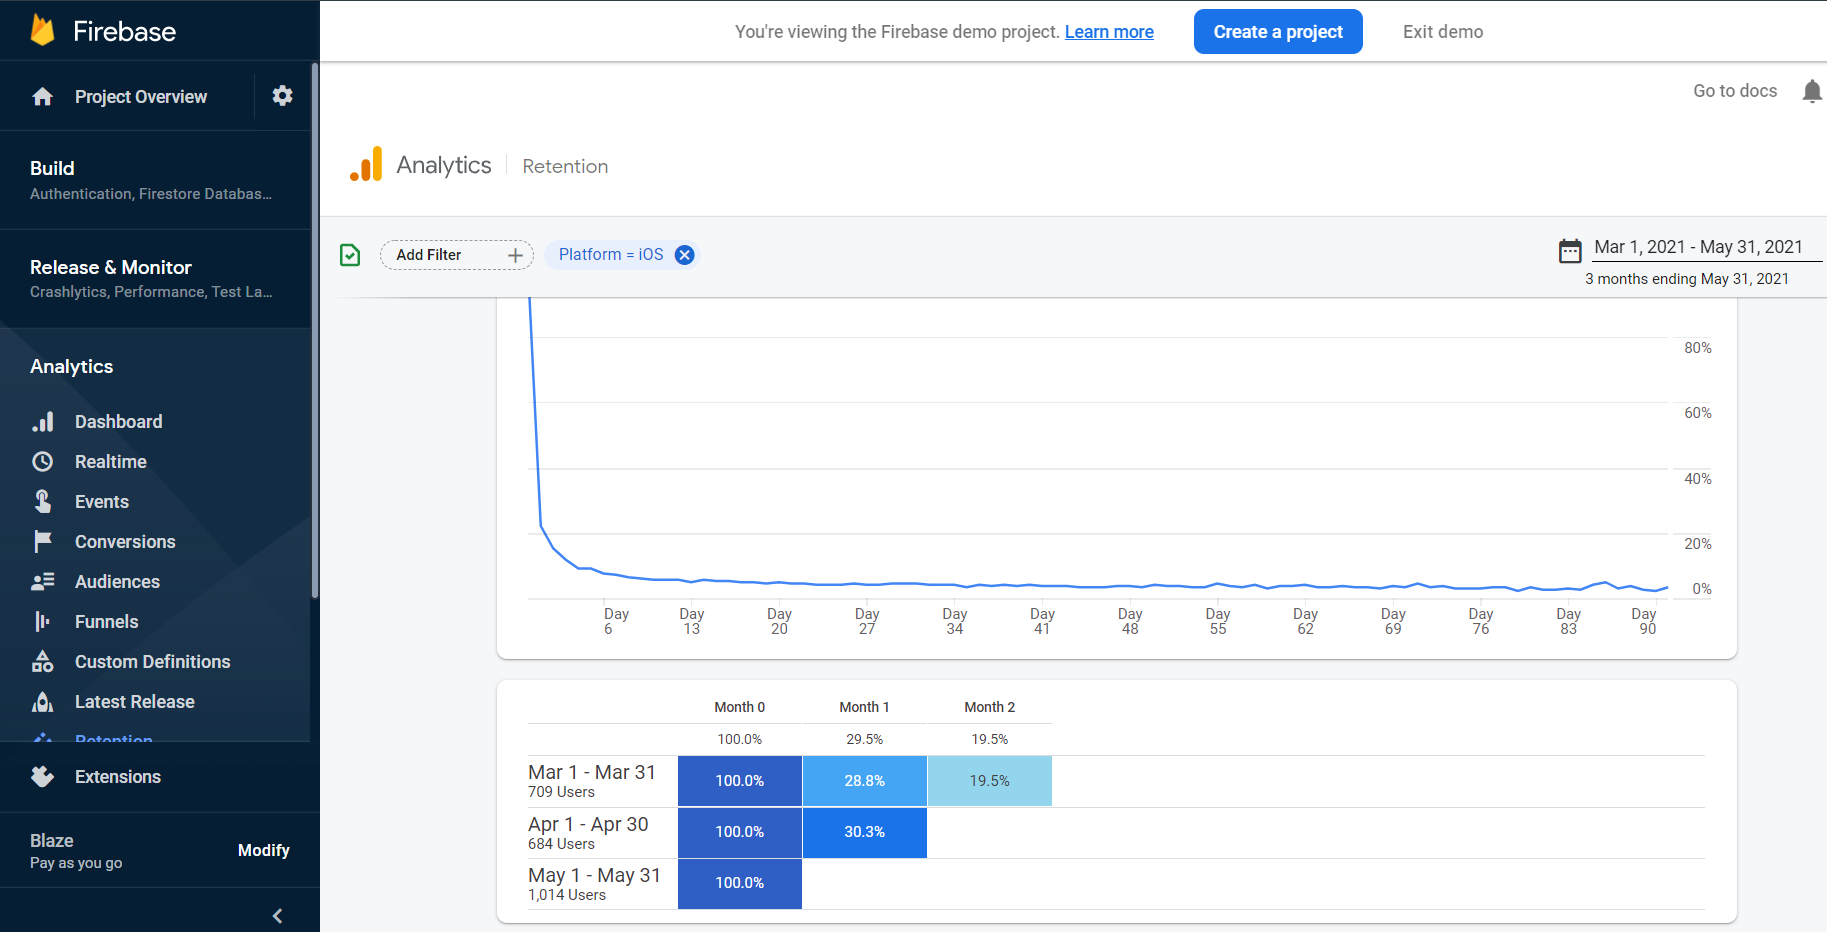

$6.7$% $< 19.5$%

Ответ: на второй месяц пользования приложением удержание выше на платформе iOS 

### Решение пункта 2

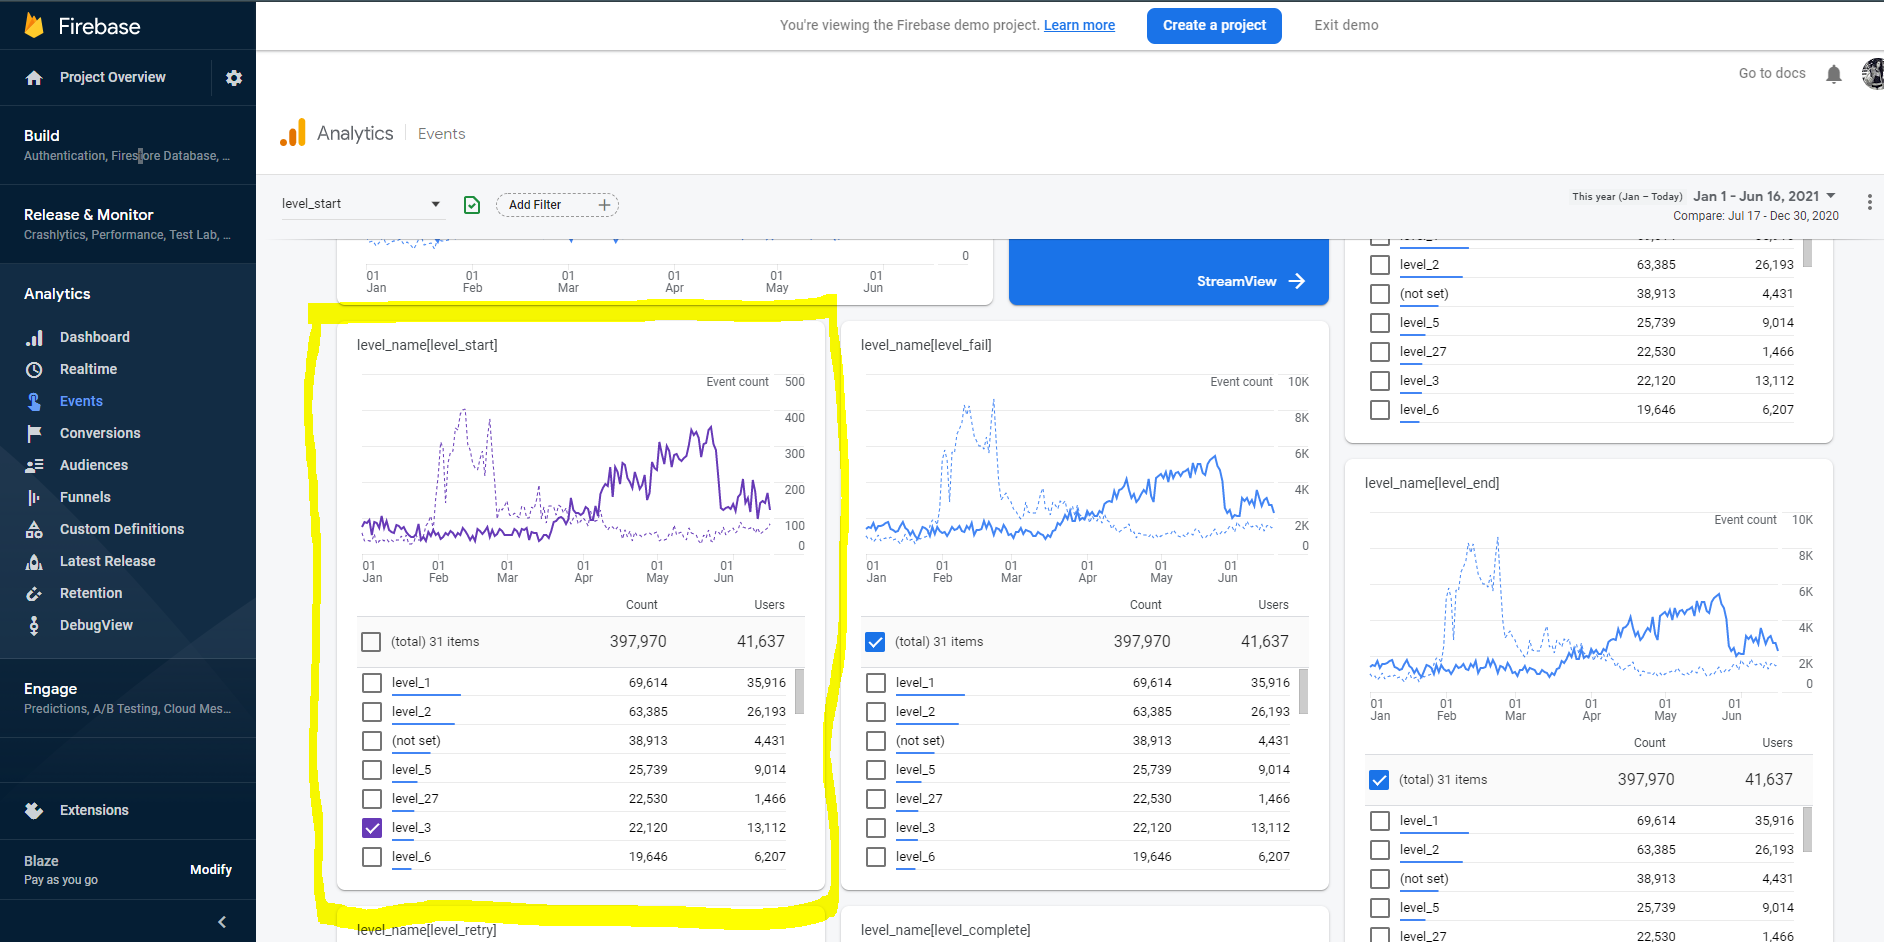

In [234]:
13.112 / 41.637 * 100

31.491221749885916

Ответ: За текущий год приблизительно 31.5% пользователей доходит до 3 уровня

### Решение пункта 3

За текущий год чаще всего заканчивают уровни жители Бразилии (т.к. не было уточнено, графики брались за весь текущий 2021 год)

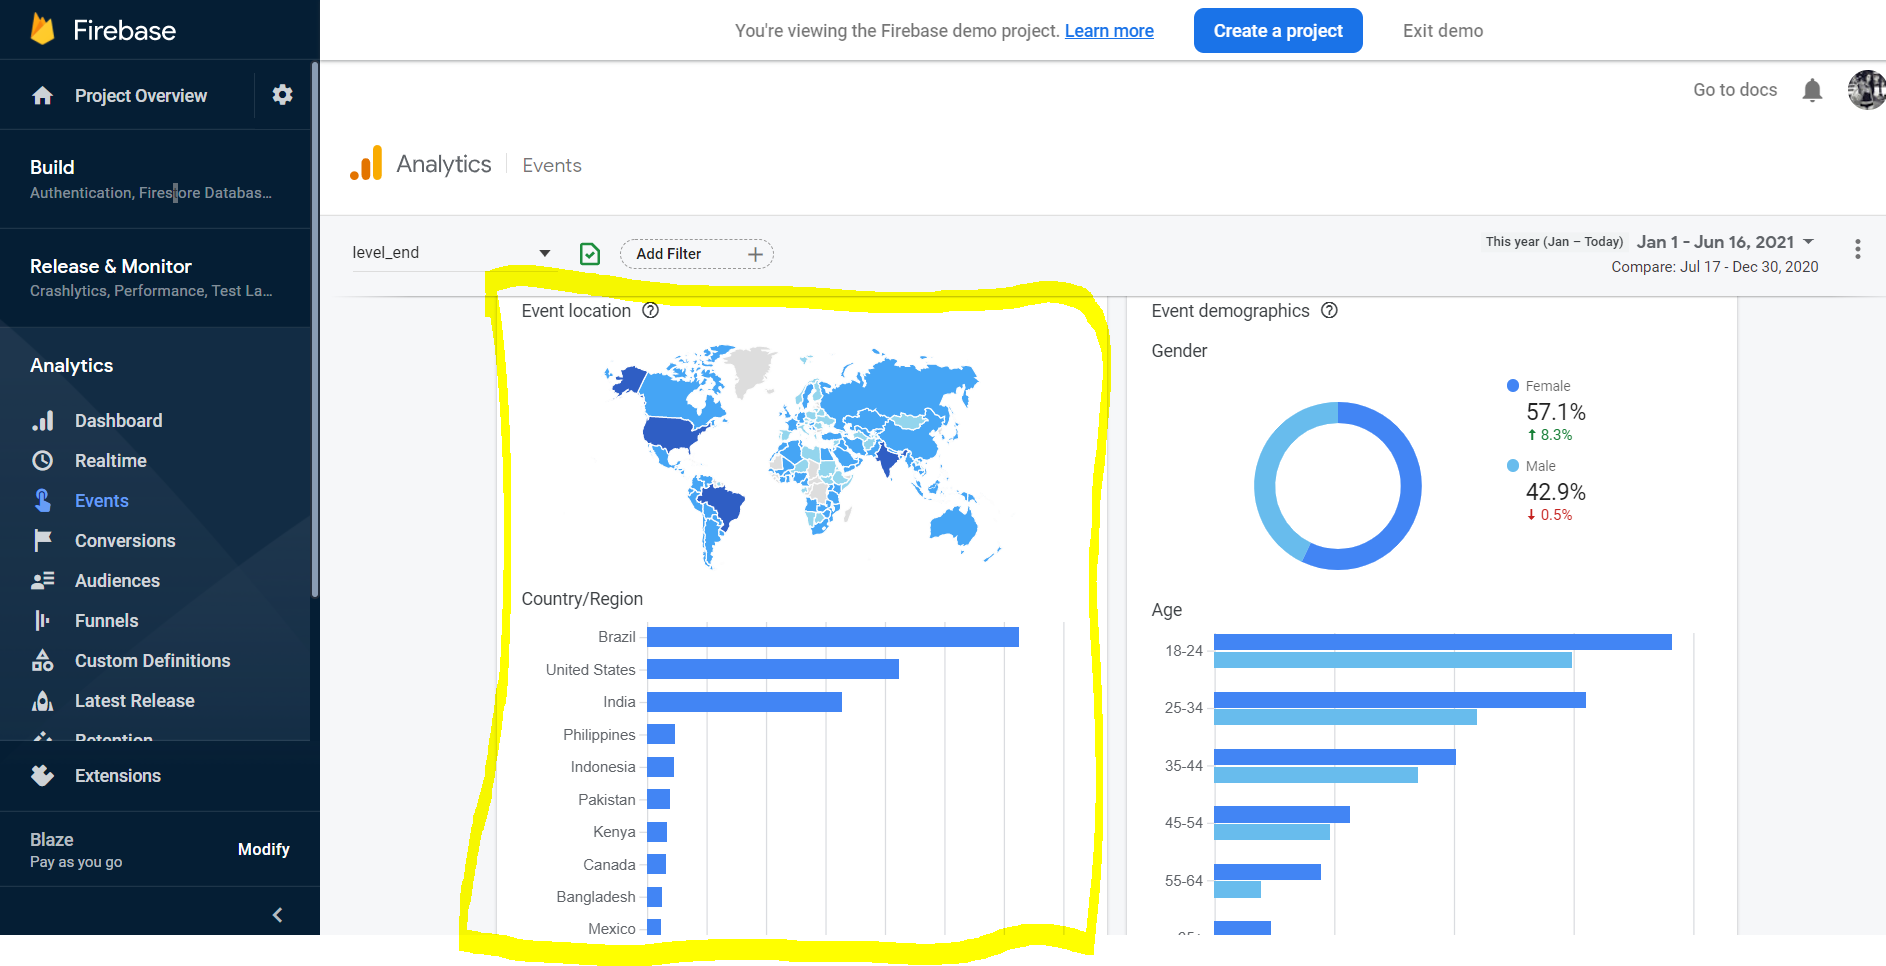

Начинают уровни чаще всего так же жители Бразилии

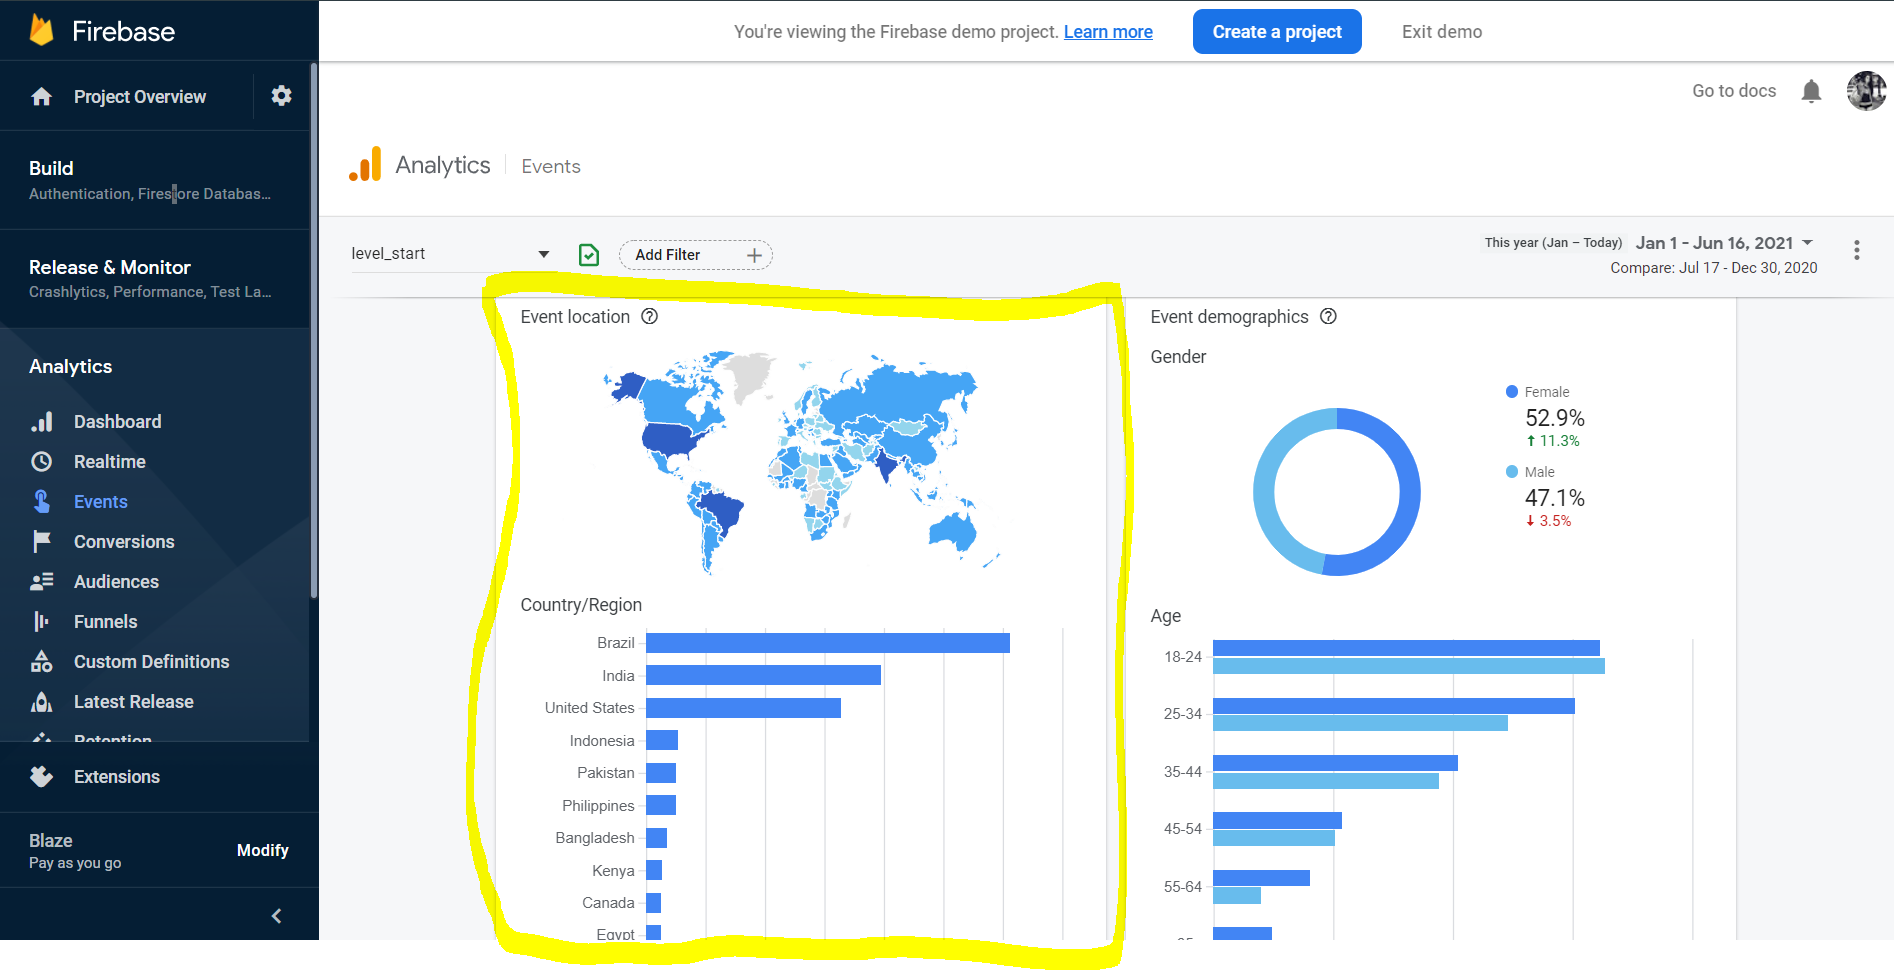

## Ответы на вопросы

Выдели с какими инструментами/технологиями/языками тебе доводилось работать?

- SQL запросы на PostgreSQL и MySQL
- Python
- Excel

Готов ли ты, начиная с сентября, рассматривать официальное трудоустройство? Выдели
необходимый вариант:
- Буду готов к работе на полной занятости